# Sustainability challenge

---

## The brief

> **URGENT: Sustainability team request**
>
> The sustainability team is presenting to leadership Monday morning. They need a quick data snapshot of our product assortment's sustainability profile before EOD.
>
> Use the Systembolaget data to answer their questions below.
>
> **Present your findings clearly** - they're not technical people. Use markdown cells to write your conclusions.
>
> **Deadline: EOD**

---

## Getting started

Run this cell to load the data:

In [6]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

response = requests.get("https://susbolaget.emrik.org/v1/products")
data = response.json()
df = pd.DataFrame(data)

print(f"Loaded {len(df)} products")

Loaded 27365 products


In [2]:
df.ethicalLabel.value_counts()

ethicalLabel
Fairtrade        59
Fair for Life    36
Name: count, dtype: int64

### Useful columns for this assignment:

| Column | Description |
|--------|-------------|
| `isOrganic` | True/False - is the product organic? |
| `isSustainableChoice` | True/False - Systembolaget's sustainable choice label |
| `isClimateSmartPackaging` | True/False - climate-smart packaging |
| `isEthical` | True/False - ethical certification |
| `categoryLevel1` | Main category (Vin, Öl, Sprit, etc.) |
| `country` | Country of origin |
| `price` | Price in SEK |


<details>
<summary><strong>Click here for full column reference</strong></summary>

### Product identification
| Column | Type | Description |
|--------|------|-------------|
| `productId` | string | Unique product identifier |
| `productNumber` | string | Product number (full) |
| `productNumberShort` | string | Short product number |
| `productNameBold` | string | Product name (brand/main name) |
| `productNameThin` | string | Product name (variant/description) |

### Producer & Supplier
| Column | Type | Description |
|--------|------|-------------|
| `producerName` | string | Name of the producer |
| `supplierName` | string | Name of the supplier |

### Categories
| Column | Type | Description |
|--------|------|-------------|
| `category` | string | General category |
| `categoryLevel1` | string | Main category (Vin, Öl, Sprit, Cider & blanddrycker, Alkoholfritt) |
| `categoryLevel2` | string | Sub-category (e.g., Rött vin, Vitt vin, Lager) |
| `categoryLevel3` | string | More specific category |
| `categoryLevel4` | string | Most specific category |
| `customCategoryTitle` | string | Custom display category |

### Origin
| Column | Type | Description |
|--------|------|-------------|
| `country` | string | Country of origin |
| `originLevel1` | string | Region level 1 |
| `originLevel2` | string | Region level 2 (more specific) |
| `isManufacturingCountry` | bool | Is it manufactured in the listed country? |

### Price & Volume
| Column | Type | Description |
|--------|------|-------------|
| `price` | float | Price in SEK |
| `volume` | int | Volume in ml |
| `volumeText` | string | Volume as text (e.g., "750 ml") |
| `alcoholPercentage` | float | Alcohol percentage |
| `recycleFee` | float | Recycling fee (pant) |

### Sustainability flags
| Column | Type | Description |
|--------|------|-------------|
| `isOrganic` | bool | Organic certification |
| `isSustainableChoice` | bool | Systembolaget's sustainable choice |
| `isClimateSmartPackaging` | bool | Climate-smart packaging |
| `isEthical` | bool | Ethical certification |
| `ethicalLabel` | string | Name of ethical certification |

### Packaging
| Column | Type | Description |
|--------|------|-------------|
| `bottleText` | string | Bottle/container type (Flaska, Burk, etc.) |
| `packagingLevel1` | string | Packaging category |
| `packagingCO2ImpactLevel` | string | CO2 impact level (Lägre, Medel, Högre) |

### Taste characteristics
| Column | Type | Description |
|--------|------|-------------|
| `taste` | string | Taste description (free text) |
| `tasteSymbols` | list | Taste symbols/pairings |
| `tasteClockSweetness` | int | Sweetness (0-12 scale) |
| `tasteClockBody` | int | Body/fullness (0-12 scale) |
| `tasteClockFruitacid` | int | Fruit acidity (0-12 scale) |
| `tasteClockBitter` | int | Bitterness (0-12 scale) |
| `tasteClockRoughness` | int | Roughness/tannins (0-12 scale) |
| `tasteClockSmokiness` | int | Smokiness (0-12 scale) |
| `tasteClockCasque` | int | Oak/barrel character (0-12 scale) |
| `color` | string | Color description |
| `usage` | string | Serving suggestion |

### Wine-specific
| Column | Type | Description |
|--------|------|-------------|
| `vintage` | string | Vintage year |
| `grapes` | list | Grape varieties |
| `seal` | string | Closure type (cork, screw cap, etc.) |

### Stock & Availability
| Column | Type | Description |
|--------|------|-------------|
| `isCompletelyOutOfStock` | bool | Completely out of stock |
| `isTemporaryOutOfStock` | bool | Temporarily out of stock |
| `isDiscontinued` | bool | Product discontinued |
| `assortmentText` | string | Assortment type (Fast, Tillfälligt, etc.) |
| `assortment` | string | Assortment code |

### Launch & News
| Column | Type | Description |
|--------|------|-------------|
| `isNews` | bool | Is it a new product? |
| `isWebLaunch` | bool | Web launch product |
| `productLaunchDate` | string | Launch date (ISO format) |

### Historical data (nested)
| Column | Type | Description |
|--------|------|-------------|
| `priceHistory` | list | List of {x: timestamp, y: price} |
| `alcoholHistory` | list | List of {x: timestamp, y: alcohol%} |
| `soldVolume` | list | List of {x: timestamp, y: volume sold} |

### Other
| Column | Type | Description |
|--------|------|-------------|
| `isKosher` | bool | Kosher certification |
| `sugarContent` | float | Sugar content (g/l) |
| `sugarContentGramPer100ml` | float | Sugar per 100ml |
| `images` | list | Product images |

</details>

---

## 1. The big picture

*What percentage of our assortment is organic? What about sustainable choice and climate-smart packaging? Etc.*

**A. Check the data info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27365 entries, 0 to 27364
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   productId                        27365 non-null  object 
 1   productNumber                    27365 non-null  object 
 2   productNameBold                  27365 non-null  object 
 3   productNameThin                  24504 non-null  object 
 4   category                         0 non-null      object 
 5   productNumberShort               27365 non-null  object 
 6   producerName                     27291 non-null  object 
 7   supplierName                     27357 non-null  object 
 8   isKosher                         27365 non-null  bool   
 9   bottleText                       27365 non-null  object 
 10  restrictedParcelQuantity         27365 non-null  int64  
 11  isOrganic                        27365 non-null  bool   
 12  isSustainableChoic

**B.Percentage of Organic Product**

In [4]:
df.isOrganic.value_counts(normalize=True).round(2)

isOrganic
False    0.88
True     0.12
Name: proportion, dtype: float64

/var/folders/m6/kchw2h3943z39q2k6bmlw1f80000gn/T/ipykernel_1216/1401468377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isOrganic', data=df, palette=['#e74c3c', '#2ecc71'])


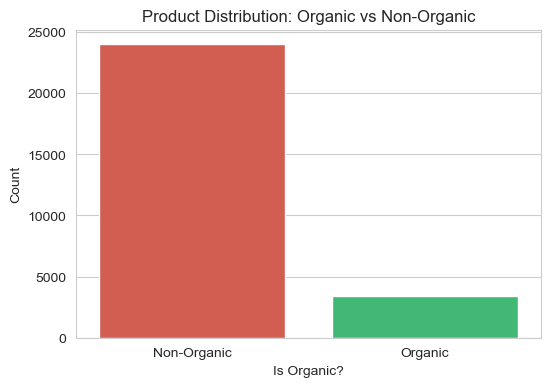

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isOrganic', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Product Distribution: Organic vs Non-Organic')
plt.xlabel('Is Organic?')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.show()

**C.Percentage of Packaging CO2 Impact Level**

In [22]:
impact_counts = df.packagingCO2ImpactLevel.value_counts(normalize=True).round(2)
impact_counts

packagingCO2ImpactLevel
Högre    0.75
Lägre    0.13
Medel    0.12
Name: proportion, dtype: float64

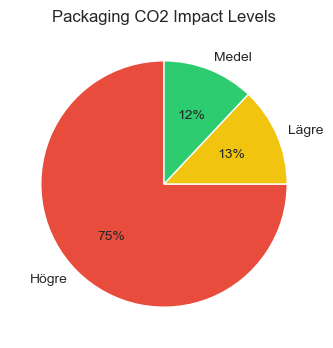

In [23]:
# Create a pie chart
plt.figure(figsize=(6, 4))
# We define specific colors: Red for High, Yellow for Medium, Green for Low
colors = ['#e74c3c', '#f1c40f', '#2ecc71'] 

# Reorder the index to ensure the colors match the logic (High -> Medium -> Low)


plt.pie(impact_counts, labels=impact_counts.index, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Packaging CO2 Impact Levels')
plt.show()

**D.Percentage of Sustainable Choice Product**

In [5]:
df.isSustainableChoice.value_counts(normalize=True).round(2)

isSustainableChoice
False    0.98
True     0.02
Name: proportion, dtype: float64

/var/folders/m6/kchw2h3943z39q2k6bmlw1f80000gn/T/ipykernel_1216/220558686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isSustainableChoice', data=df, palette=['#e74c3c', '#2ecc71'])


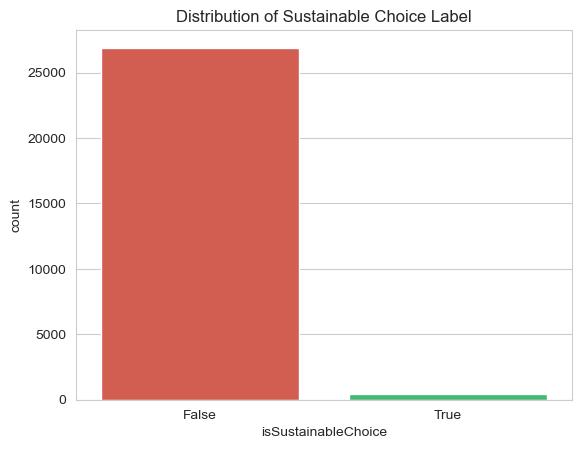

In [24]:
sns.countplot(x='isSustainableChoice', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Distribution of Sustainable Choice Label')
plt.show()

**Your findings:**

*Write your conclusions here...*

I found that only 12% of our stock is organic and just 2% is sustainable. Also, regarding packaging CO2 impact, Högre has the most products of any category in the store.

---

## 2. Category breakdown

*Which product categories have the highest percentage of organic products? Which have the lowest? Other intereting findings?*

**A.Percentage of category product for organic and non organic**

In [45]:
df.groupby("categoryLevel1")["isOrganic"].value_counts(normalize=True).round(2)

categoryLevel1        isOrganic
Alkoholfritt          False        0.83
                      True         0.17
Cider & blanddrycker  False        0.85
                      True         0.15
Sprit                 False        0.95
                      True         0.05
Vin                   False        0.82
                      True         0.18
Öl                    False        0.97
                      True         0.03
Name: proportion, dtype: float64

**B.Percentage of category product for only organic**

In [6]:
df[df['isOrganic'] == True]["categoryLevel1"].value_counts(normalize=True).round(2)

categoryLevel1
Vin                     0.84
Sprit                   0.08
Öl                      0.05
Cider & blanddrycker    0.02
Alkoholfritt            0.01
Name: proportion, dtype: float64

**C.Percentage of category product level 2 for only organic**

In [35]:
df[df['isOrganic'] == True]["categoryLevel2"].value_counts(normalize=True).round(2)

categoryLevel2
Rött vin                        0.40
Vitt vin                        0.28
Mousserande vin                 0.09
Rosévin                         0.05
Gin & Genever                   0.03
Ljus lager                      0.02
Akvavit & Kryddat brännvin      0.02
Cider                           0.02
Ale                             0.02
Vinlåda                         0.02
Whisky                          0.01
Vodka & Okryddat brännvin       0.01
Glögg och Glühwein              0.01
Blanddryck                      0.01
Likör                           0.00
Smaksatt vin & fruktvin         0.00
Syrlig öl                       0.00
Mellanmörk & Mörk lager         0.00
Mousserande                     0.00
Drinkar & Cocktails             0.00
Veteöl                          0.00
Porter & Stout                  0.00
Must                            0.00
Smaksatt sprit                  0.00
Starkvin                        0.00
Rom & Lagrad sockerrörssprit    0.00
Cider & Blanddryck     

**D.Percentage of category product level 2 for non-organic**

In [8]:
df[df['isOrganic'] == False]["categoryLevel2"].value_counts(normalize=True).round(2)

categoryLevel2
Rött vin                        0.26
Vitt vin                        0.15
Ale                             0.09
Mousserande vin                 0.09
Whisky                          0.08
Ljus lager                      0.04
Gin & Genever                   0.03
Likör                           0.03
Rom & Lagrad sockerrörssprit    0.02
Syrlig öl                       0.02
Porter & Stout                  0.02
Rosévin                         0.02
Starkvin                        0.01
Vinlåda                         0.01
Mellanmörk & Mörk lager         0.01
Akvavit & Kryddat brännvin      0.01
Cider                           0.01
Blanddryck                      0.01
Grappa & Marc                   0.01
Smaksatt vin & fruktvin         0.01
Vodka & Okryddat brännvin       0.01
Tequila & Mezcal                0.01
Smaksatt sprit                  0.01
Armagnac & Brandy               0.01
Cognac                          0.01
Veteöl                          0.00
Annan öl               

**Your findings:**

*Write your conclusions here...*

The Wine category dominates our organic offering, accounting for 84% of all organic products. Within the wine category, Red Wine is the largest segment, making up 40%. Even when comparing the entire inventory (organic and non-organic), Wine remains the dominant category, with 18% of the products being organic.

Beer has the lowest organic variety across the total product range, with only 3% of beers being organic. However, if we look strictly at the composition of our organic inventory, Alcohol-Free and liquer products make up the smallest share, at only 1%.

---

## 3. The price question

*Leadership will ask: "Do organic products cost more?"*

*Compare the average price of organic vs non-organic products. What's the difference? Has it changed over time?*

**A.Average current price for organic and non-organic product**

In [13]:
df.groupby("isOrganic")["price"].mean().round(2)

isOrganic
False    657.48
True     378.72
Name: price, dtype: float64

**B.Creating function for extract only historic price from priceHistory Column**

In [14]:
row = df.iloc[0]
price_history = row['priceHistory']
def first_value(price_history):
    return price_history[0]['y']

**C.Average Historic price for organic and non-organic product**

In [15]:
# extracting historic price value using the fist_value function
df['firstPrice'] = df['priceHistory'].apply(first_value)

# calculating mean historic price 
df.groupby("isOrganic")["firstPrice"].mean().round(2)

isOrganic
False    632.84
True     374.96
Name: firstPrice, dtype: float64

**Your findings:**

*Write your conclusions here...*

Non-organic products have consistently higher average prices, a trend that has not changed over time. This is primarily because the non-organic category includes high-value items such as liquor, as well as the majority of wine and beer products.

---

## 4. Origin analysis

*Which countries produce the most organic products in our assortment? What origins are popular? Does it differ for categories? And is it different from non-organic products?*

**A. Top 5 Countries Producing Organic Products**

In [24]:
organicCountry = df[df["isOrganic"] == True]["country"].value_counts().head(5)

country
Frankrike    899
Italien      780
Spanien      483
Sverige      435
Österrike    192
Name: count, dtype: int64

**B.Top 5 Organic Origins (level 1)**

In [25]:
df[df["isOrganic"] == True]["originLevel1"].value_counts().head(5)

originLevel1
Toscana       202
Bourgogne     158
Rhonedalen    135
Katalonien    119
Piemonte      115
Name: count, dtype: int64

**C.Top 5 Countries Producing Non-Organic Products**

In [28]:
df[df["isOrganic"] == False]["country"].value_counts().head(5)

country
Sverige           5213
Frankrike         4361
Italien           3670
Storbritannien    1702
Spanien           1522
Name: count, dtype: int64

**D.Top 5 Non-Organic Origins (level 1)**

In [30]:
df[df["isOrganic"] == False]["originLevel1"].value_counts().head(5)

originLevel1
Champagne               1216
Skottland               1206
Piemonte                1152
Västra Götalands län     950
Bourgogne                873
Name: count, dtype: int64

**Your findings:**

*Write your conclusions here...*

According to my findings, the top five countries producing organic products in our store are France (899 products), Italy (780), Spain (483), Sweden (435), and Australia (192). Additionally, Tuscany is the most common origin for organic products.

In the non-organic category, Sweden is the leading producer with a total of 5,213 products. Finally, Champagne is the most frequent origin for non-organic products.

## 5. Overlap analysis

*How many products are both organic AND sustainable choice? How many are organic OR sustainable choice? How does the overlaps look like for different categories?*

**A.Check the total of each organic and sustainable products**

In [34]:
df.groupby(["isOrganic", "isSustainableChoice"]).size()

isOrganic  isSustainableChoice
False      False                  23815
           True                     195
True       False                   3118
           True                     261
dtype: int64

**B.Check the total of each organic and sustainable per category level 1 products**

In [33]:
df.groupby(["categoryLevel1", "isOrganic", "isSustainableChoice"]).size()

categoryLevel1        isOrganic  isSustainableChoice
Alkoholfritt          False      False                    167
                                 True                       2
                      True       False                     30
                                 True                       4
Cider & blanddrycker  False      False                    409
                      True       False                     66
                                 True                       7
Sprit                 False      False                   5457
                                 True                       3
                      True       False                    264
                                 True                      16
Vin                   False      False                  13115
                                 True                     190
                      True       False                   2637
                                 True                     199
Öl               

**Your findings:**

*Write your conclusions here...*

According to my findings, most of our product is domiated by non-organic and non-sustainable product or we can call it standard product. Wine is really the only category doing the heavy lifting for organic options. Meanwhile, huge sections like Spirits and Beer are lagging behind, offering almost zero sustainable choices.

---

## 5. Bonus challenge

**Sustainability score:** Create a new column that counts how many sustainability flags are True for each product (organic, sustainable choice, climate-smart packaging, ethical). Which products score highest?

**A.Creating new column where the values is boolean (if organic, sustainable choice, climate-smart packaging, ethical are True) then count total of each result**

In [34]:
df['sustainableFlag'] = ((df['isOrganic'] == True) | (df['isSustainableChoice'] == True) | (df['packagingCO2ImpactLevel'] == True) | (df['ethicalLabel'].isin(['Fairtrade', 'Fair for Life '])))

df['sustainableFlag'].value_counts(normalize=True).round(2)

sustainableFlag
False    0.87
True     0.13
Name: proportion, dtype: float64

**B. Counting each category level 1 that has sustainable flag only**

In [37]:
df[df['sustainableFlag']== True]["categoryLevel1"].value_counts(normalize=True).round(2).head(5)

categoryLevel1
Vin                     0.85
Sprit                   0.08
Öl                      0.04
Cider & blanddrycker    0.02
Alkoholfritt            0.01
Name: proportion, dtype: float64

**Your findings:**

*Write your conclusions here...*

According to my findings, 87% of our products do not carry a sustainability flag (organic, sustainable choice, climate-smart packaging, ethical), while only 13% do. Wine dominates the sustainable category, accounting for 3,033 items (85% of the total).

---

## Summary for leadership

*Use this cell to write a 3-5 bullet point executive summary of your findings:*

- 87% of our products have no sustainability label. The small group that does (13%) is almost entirely Wine (85%), which makes our eco-friendly offer very unbalanced.
- While Wine is doing well, our other major sections are far behind. Beer is only 3% organic, and alcohol free drink,liquer have almost 1% sustainable options.
- And, our non-organic products cost more on average. This means we can add sustainable items without making our prices look too expensive to customers.